<a href="https://colab.research.google.com/github/najlaatikahdwirahma/AssignmentSC/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data manipulating & data analysis
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # data visualization
import numpy as np
import plotly.express as px
from scipy import stats

In [ ]:
df_heart=pd.read_csv('/content/heart.csv')

In [ ]:
df_heart.shape

(1025, 14)

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
#Memeriksa data types
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Mengubah variabel categorical menjadi tipe data objek
*   Categorical: sex, cp, fbs, restecg, exang, slope, ca, thal, target
*   Continuous: age, trestbps, chol, thalach, oldpeak




In [ ]:
obj = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_heart[obj] = df_heart[obj].astype(object)

In [ ]:
df_heart.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#Memeriksa data mistakes
df_heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

a. Feature 'ca' berkisar antara 0–3, tetapi pada df.nunique() mencantumkan 0–4. Jadi nilai '4' diubah ke NaN.



In [ ]:
df_heart['ca'].nunique()

5

In [ ]:
df_heart.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [ ]:
df_heart.loc[df_heart['ca']==4, 'ca'] = np.NaN

In [ ]:
df_heart['ca'].value_counts()

0    578
1    226
2    134
3     69
Name: ca, dtype: int64

b. Feature 'thal' berkisar antara 1–3, tetapi pada df.nunique() mencantumkan 0–3. Jadi nilai '0' diubah ke NaN.

In [ ]:
df_heart['thal'].nunique()

4

In [ ]:
df_heart.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [ ]:
df_heart.loc[df_heart['thal']==0, 'thal'] = np.NaN

In [ ]:
df_heart.thal.value_counts()

2    544
3    410
1     64
Name: thal, dtype: int64

In [ ]:
df_heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64



# **1. Data Preparation**



In [ ]:
#Mengidentifikasi missing value
df_heart.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

In [ ]:
df_heart = df_heart.fillna(df_heart.median())
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Mengidentifikasi duplikat
duplicated = df_heart.duplicated().sum()
if duplicated:
  print('Duplicate rows are: {}'.format(duplicated))
else:
  print('There is no duplicate values')

Duplicate rows are: 723


In [ ]:
df_heart.drop_duplicates(inplace = True)
print(df_heart.shape)

(302, 14)


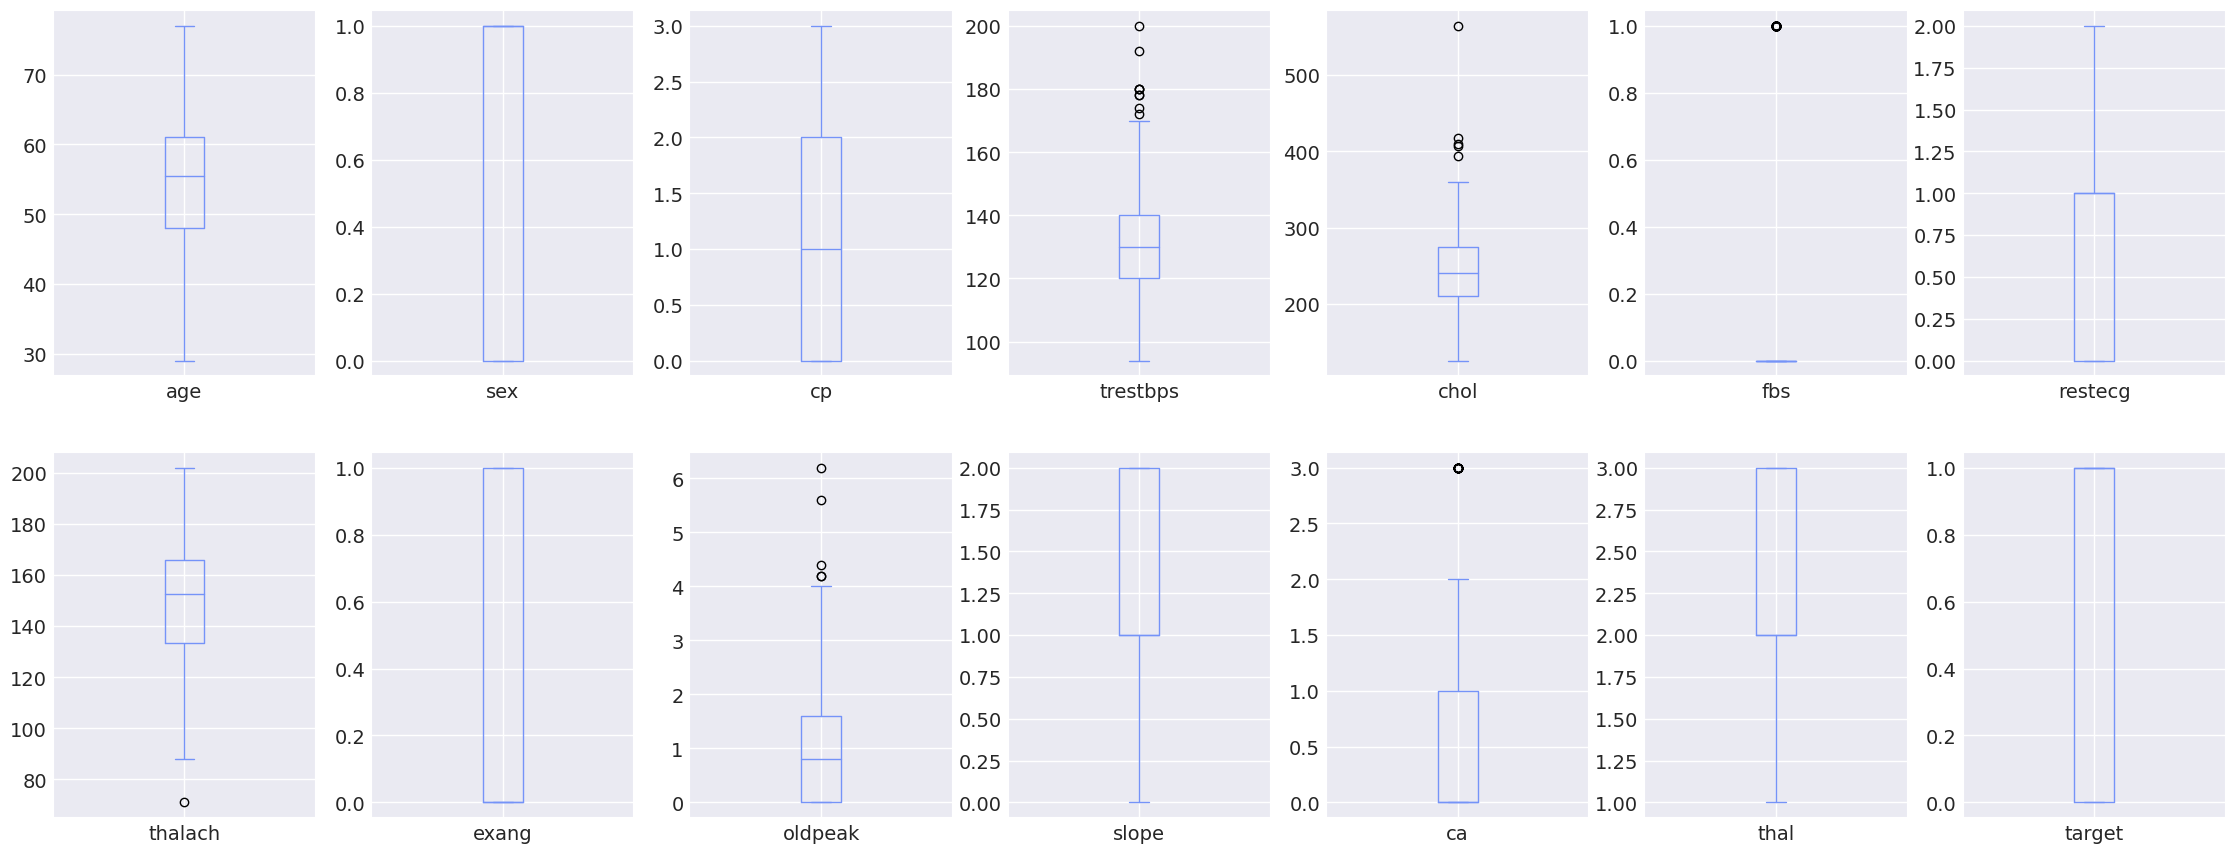

In [ ]:
#Memeriksa outliers menggunakan visualisasi boxplot
df_heart.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (25, 10), color = '#7593F8');

In [ ]:
#define continuous variable
continuous_features = ['age','trestbps','chol','thalach','oldpeak']

def remove_outliers(df, continuous_features):
    for feature in continuous_features:
        # Menghitung Q1 and Q3
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        # Menghitung interquartile range (IQR)
        IQR = Q3 - Q1
        # Menentukan outlier step
        outlier_step = 1.5 * IQR
        # Mengidentifikasi outliers
        outliers = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]
        # Menghapus outliers dari dataframe
        df = df[~df.isin(outliers)].dropna()
        # Print jumlah outlier yang terdeteksi dan dihapus
        print('Number of outliers detected and removed from {} feature: {}'.format(feature, outliers.shape[0]))

    return df

# Menghapus outliers dari heart dataset
df_heart_clean = remove_outliers(df_heart, continuous_features)

Number of outliers detected and removed from age feature: 0
Number of outliers detected and removed from trestbps feature: 9
Number of outliers detected and removed from chol feature: 5
Number of outliers detected and removed from thalach feature: 1
Number of outliers detected and removed from oldpeak feature: 4


In [ ]:
#Mengidentfikasi data imbalance
print(df_heart_clean.target.value_counts())

labels = ["Heart Disease", "No Disease"]
healthy_or_not = df_heart_clean['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=df_heart_clean['target'].value_counts(), names = labels , width = 700, height = 400,
             color_discrete_sequence = ["#F4B278","#7593F8"], title = "No Disease vs Heart Disease")

fig.show()

1.00    158
0.00    125
Name: target, dtype: int64


Kita bisa melihat datanya cukup balanced. Terdapat 158 ​​(55,8%) pasien penyakit jantung, dan 125 (44,2%) pasien tanpa penyakit jantung.

In [ ]:
df_heart_clean.describe() #Summary statistic setelah data cleansing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00
mean,54.05,0.70,0.99,129.88,242.31,0.14,0.52,149.96,0.32,0.95,1.43,0.64,2.31,0.56
std,9.13,0.46,1.03,15.39,44.65,0.35,0.51,22.69,0.47,1.03,0.60,0.91,0.58,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,88.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,47.00,0.00,0.00,120.00,210.50,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,239.00,0.00,1.00,153.00,0.00,0.60,1.00,0.00,2.00,1.00
75%,60.00,1.00,2.00,140.00,270.50,0.00,1.00,168.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,170.00,360.00,1.00,2.00,202.00,1.00,4.00,2.00,3.00,3.00,1.00


# **2. Feature Engineering**

In [ ]:
#Kategori usia
def age_category(row):
    if row['age'] < 11:
        return 'anak-anak'
    elif row['age'] < 20:
        return 'remaja'
    elif row['age'] < 40:
        return 'dewasa'
    else:
        return 'lanjut usia'

df_heart_clean['age_category'] = df_heart_clean.apply(age_category, axis=1)
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,1.00,0.00,2.00,1.00,lanjut usia
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,1.00,0.00,2.00,1.00,lanjut usia
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,2.00,1.00,3.00,0.00,lanjut usia
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,2.00,0.00,2.00,0.00,lanjut usia


In [ ]:
#Kategori tekanan darah
def blood_pressure_category(row):
    if row['trestbps'] < 120:
        return 'rendah'
    elif row['trestbps'] < 140:
        return 'normal'
    else:
        return 'tinggi'

df_heart_clean['blood_pressure_category'] = df_heart_clean.apply(blood_pressure_category, axis=1)
df_heart_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,blood_pressure_category
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia,normal
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia,tinggi
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia,tinggi
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,tinggi
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia,normal


In [ ]:
#Indikator kadar kolesterol normal
df_heart_clean['normal_cholesterol'] = (df_heart_clean['chol'] <= 200).astype(int)
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,blood_pressure_category,normal_cholesterol
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia,normal,0
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia,tinggi,0
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia,tinggi,1
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,tinggi,0
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,1.00,0.00,2.00,1.00,lanjut usia,normal,0
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,1.00,0.00,2.00,1.00,lanjut usia,rendah,1
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,normal,0
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,2.00,0.00,2.00,0.00,lanjut usia,tinggi,0


In [ ]:
#Indikator kadar kolesterol tinggi
df_heart_clean['high_cholesterol'] = (df_heart_clean['chol'] > 200).astype(int)
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia,normal,0,1
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia,tinggi,0,1
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia,tinggi,1,0
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,tinggi,0,1
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia,normal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,1.00,0.00,2.00,1.00,lanjut usia,normal,0,1
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,1.00,0.00,2.00,1.00,lanjut usia,rendah,1,0
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,normal,0,1
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,2.00,0.00,2.00,0.00,lanjut usia,tinggi,0,1


In [ ]:
#Indikator tekanan darah tinggi dan kolesterol tinggi
df_heart_clean['high_bp_and_high_cholesterol'] = ((df_heart_clean['blood_pressure_category'] == 'tinggi') & (df_heart_clean['high_cholesterol'] == 1)).astype(int)
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia,normal,0,1,0
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia,tinggi,0,1,1
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia,tinggi,1,0,0
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,tinggi,0,1,1
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia,normal,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,1.00,0.00,2.00,1.00,lanjut usia,normal,0,1,0
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,1.00,0.00,2.00,1.00,lanjut usia,rendah,1,0,0
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,normal,0,1,0
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,2.00,0.00,2.00,0.00,lanjut usia,tinggi,0,1,1


In [ ]:
#Indikator resiko tinggi
df_heart_clean['high_risk'] = ((df_heart_clean['high_bp_and_high_cholesterol'] == 1) & (df_heart_clean['exang'] == 1)).astype(int)
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol,high_risk
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,2.00,2.00,3.00,0.00,lanjut usia,normal,0,1,0,0
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,0.00,0.00,3.00,0.00,lanjut usia,tinggi,0,1,1,1
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,0.00,0.00,3.00,0.00,lanjut usia,tinggi,1,0,0,0
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,tinggi,0,1,1,0
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,1.00,3.00,2.00,0.00,lanjut usia,normal,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,1.00,0.00,2.00,1.00,lanjut usia,normal,0,1,0,0
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,1.00,0.00,2.00,1.00,lanjut usia,rendah,1,0,0,0
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,2.00,1.00,3.00,0.00,lanjut usia,normal,0,1,0,0
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,2.00,0.00,2.00,0.00,lanjut usia,tinggi,0,1,1,0


In [ ]:
#Rasio umur terhadap denyut jantung maksimum
df_heart_clean['age_to_thalach_ratio'] = df_heart_clean['age'] / df_heart_clean['thalach']
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol,high_risk,age_to_thalach_ratio
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,...,2.00,3.00,0.00,lanjut usia,normal,0,1,0,0,0.31
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,...,0.00,3.00,0.00,lanjut usia,tinggi,0,1,1,1,0.34
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,...,0.00,3.00,0.00,lanjut usia,tinggi,1,0,0,0,0.56
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,...,1.00,3.00,0.00,lanjut usia,tinggi,0,1,1,0,0.38
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,...,3.00,2.00,0.00,lanjut usia,normal,0,1,0,0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,...,0.00,2.00,1.00,lanjut usia,normal,0,1,0,0,0.59
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,...,0.00,2.00,1.00,lanjut usia,rendah,1,0,0,0,0.25
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,...,1.00,3.00,0.00,lanjut usia,normal,0,1,0,0,0.32
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,...,0.00,2.00,0.00,lanjut usia,tinggi,0,1,1,0,0.47


In [ ]:
#Rata-rata tekanan darah terhadap usia
df_heart_clean['mean_resting_bp_to_age'] = df_heart_clean['trestbps'] / df_heart_clean['age']
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol,high_risk,age_to_thalach_ratio,mean_resting_bp_to_age
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,...,3.00,0.00,lanjut usia,normal,0,1,0,0,0.31,2.40
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,...,3.00,0.00,lanjut usia,tinggi,0,1,1,1,0.34,2.64
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,...,3.00,0.00,lanjut usia,tinggi,1,0,0,0,0.56,2.07
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,...,3.00,0.00,lanjut usia,tinggi,0,1,1,0,0.38,2.43
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,...,2.00,0.00,lanjut usia,normal,0,1,0,0,0.58,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,...,2.00,1.00,lanjut usia,normal,0,1,0,0,0.59,1.76
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,...,2.00,1.00,lanjut usia,rendah,1,0,0,0,0.25,2.45
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,...,3.00,0.00,lanjut usia,normal,0,1,0,0,0.32,2.46
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,...,2.00,0.00,lanjut usia,tinggi,0,1,1,0,0.47,2.71


In [ ]:
#Rasio Kolesterol terhadap usia
df_heart_clean['chol_to_age_ratio'] = df_heart_clean['chol'] / df_heart_clean['age']
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol,high_risk,age_to_thalach_ratio,mean_resting_bp_to_age,chol_to_age_ratio
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,...,0.00,lanjut usia,normal,0,1,0,0,0.31,2.40,4.08
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,...,0.00,lanjut usia,tinggi,0,1,1,1,0.34,2.64,3.83
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,...,0.00,lanjut usia,tinggi,1,0,0,0,0.56,2.07,2.49
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,...,0.00,lanjut usia,tinggi,0,1,1,0,0.38,2.43,3.33
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,...,0.00,lanjut usia,normal,0,1,0,0,0.58,2.23,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,...,1.00,lanjut usia,normal,0,1,0,0,0.59,1.76,3.10
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,...,1.00,lanjut usia,rendah,1,0,0,0,0.25,2.45,3.20
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,...,0.00,lanjut usia,normal,0,1,0,0,0.32,2.46,4.90
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,...,0.00,lanjut usia,tinggi,0,1,1,0,0.47,2.71,4.63


In [ ]:
#Rasio kolesterol terhadap denyut jantung maksimum
df_heart_clean['chol_to_thalach_ratio'] = df_heart_clean['chol'] / df_heart_clean['thalach']
df_heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_category,blood_pressure_category,normal_cholesterol,high_cholesterol,high_bp_and_high_cholesterol,high_risk,age_to_thalach_ratio,mean_resting_bp_to_age,chol_to_age_ratio,chol_to_thalach_ratio
0,52.00,1.00,0.00,125.00,212.00,0.00,1.00,168.00,0.00,1.00,...,lanjut usia,normal,0,1,0,0,0.31,2.40,4.08,1.26
1,53.00,1.00,0.00,140.00,203.00,1.00,0.00,155.00,1.00,3.10,...,lanjut usia,tinggi,0,1,1,1,0.34,2.64,3.83,1.31
2,70.00,1.00,0.00,145.00,174.00,0.00,1.00,125.00,1.00,2.60,...,lanjut usia,tinggi,1,0,0,0,0.56,2.07,2.49,1.39
3,61.00,1.00,0.00,148.00,203.00,0.00,1.00,161.00,0.00,0.00,...,lanjut usia,tinggi,0,1,1,0,0.38,2.43,3.33,1.26
4,62.00,0.00,0.00,138.00,294.00,1.00,1.00,106.00,0.00,1.90,...,lanjut usia,normal,0,1,0,0,0.58,2.23,4.74,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.00,0.00,2.00,120.00,211.00,0.00,0.00,115.00,0.00,1.50,...,lanjut usia,normal,0,1,0,0,0.59,1.76,3.10,1.83
733,44.00,0.00,2.00,108.00,141.00,0.00,1.00,175.00,0.00,0.60,...,lanjut usia,rendah,1,0,0,0,0.25,2.45,3.20,0.81
739,52.00,1.00,0.00,128.00,255.00,0.00,1.00,161.00,1.00,0.00,...,lanjut usia,normal,0,1,0,0,0.32,2.46,4.90,1.58
843,59.00,1.00,3.00,160.00,273.00,0.00,0.00,125.00,0.00,0.00,...,lanjut usia,tinggi,0,1,1,0,0.47,2.71,4.63,2.18


# **3. EDA**

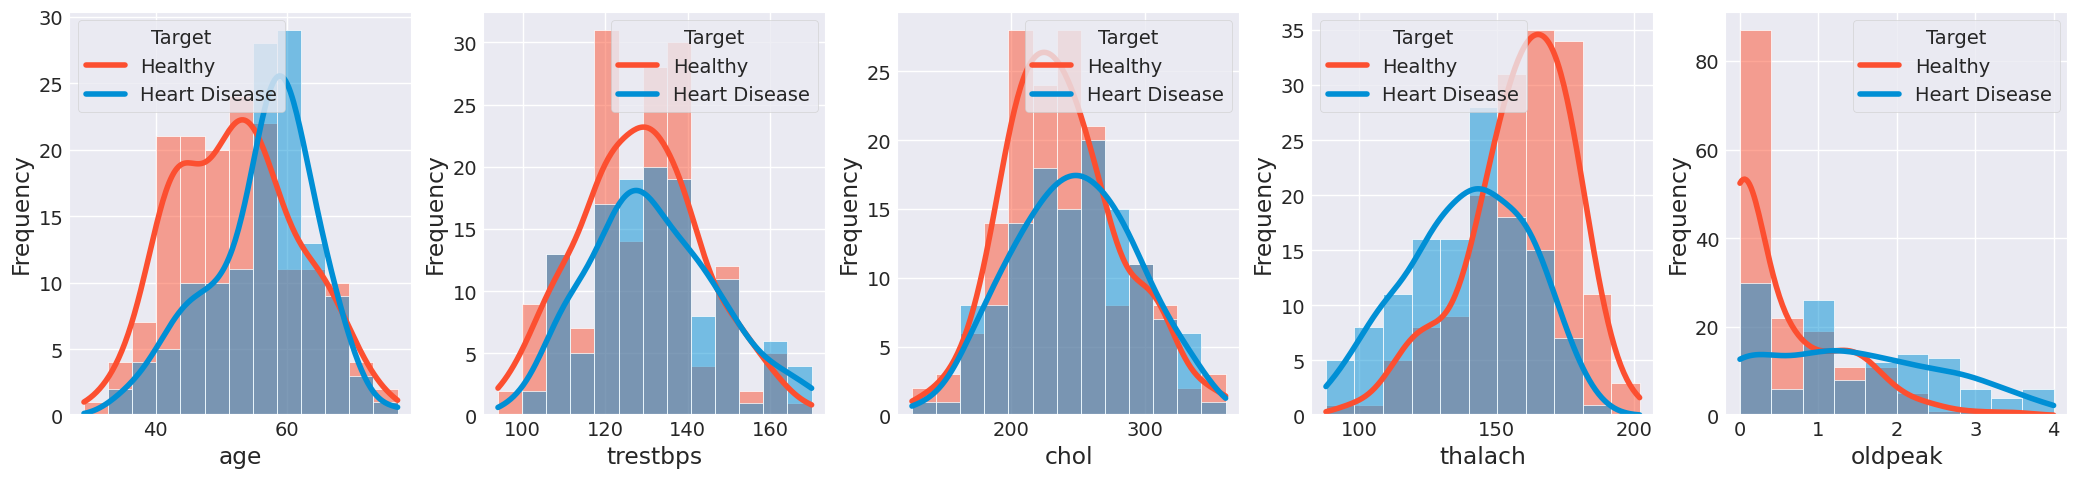

In [ ]:
#Distribusi data (Continuous variable)
sns.set_style("darkgrid")
sns.husl_palette(h = .5)

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (23,5))
for i, feature in enumerate(continuous_features):
    sns.histplot(data = df_heart_clean, x = feature, kde = True, hue = 'target', ax = axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].legend(title = "Target", labels = ["Healthy", "Heart Disease"])

In [ ]:
df_heart_clean[continuous_features].skew().round(2) # Check the skewness of features

age        -0.14
trestbps    0.26
chol        0.20
thalach    -0.48
oldpeak     0.92
dtype: float64

Seperti yang dapat kita lihat di atas, usia dan thalach mempunyai skewness negatif. Sedangkan trestbps, chol, dan oldpeak mempunyai skewness positif.



Text(0.5, 0, '0 = Male, 1 = Female')

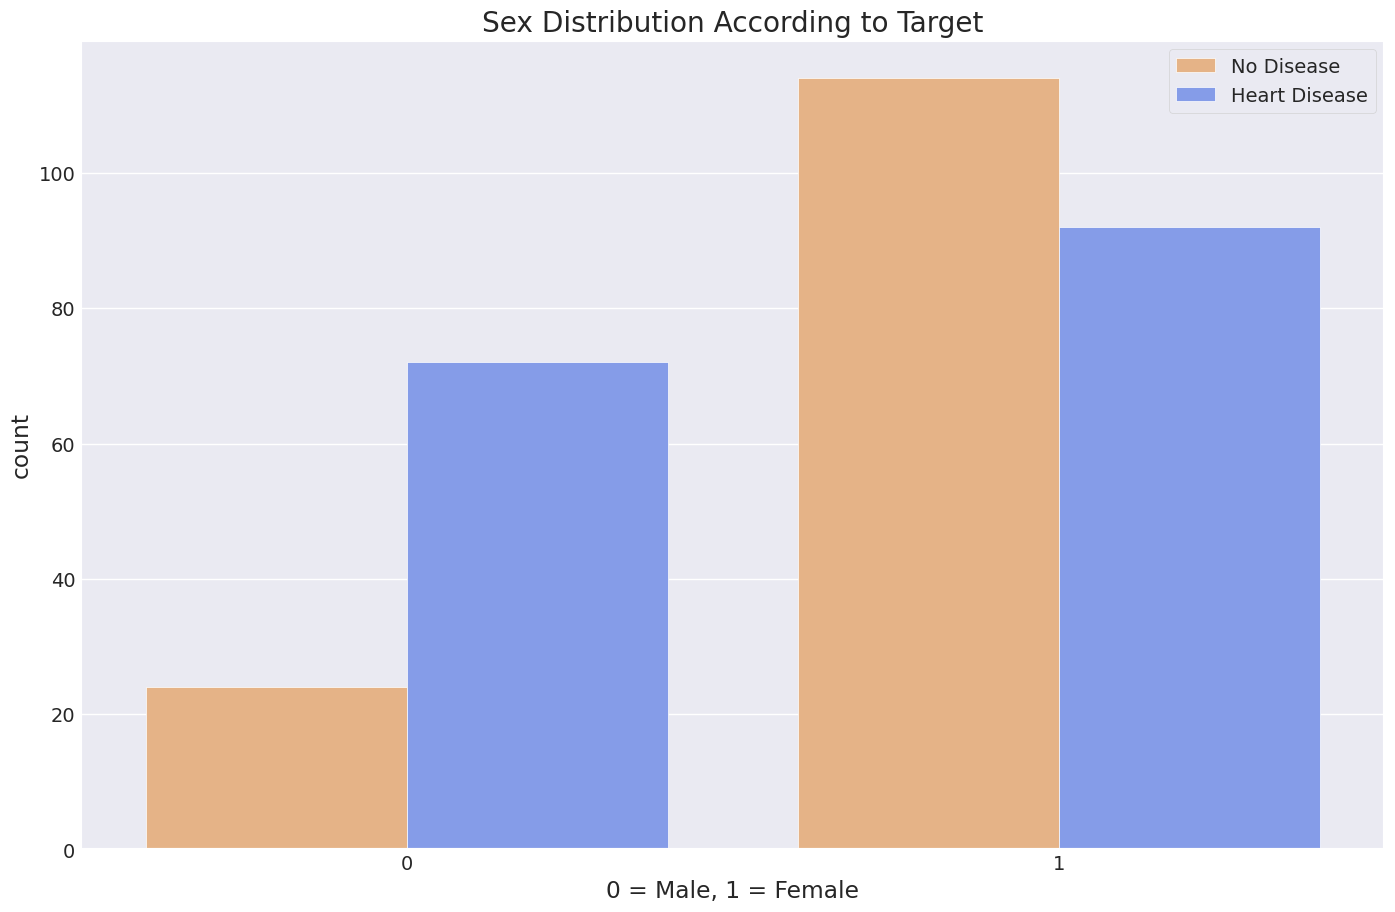

In [ ]:
#Distribusi Jenis Kelamin Sesuai Target
sns.countplot(x = 'sex', hue = 'target', data = df_heart, palette = ["#F4B278", "#7593F8"]).set_title('Sex Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('0 = Male, 1 = Female')

In [ ]:
df_heart.groupby(['target'])['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       92
        0       72
Name: sex, dtype: int64

Pasien perempuan (92 pasien perempuan) yang menderita penyakit jantung lebih banyak dibandingkan pasien laki-laki (72 pasien laki-laki).

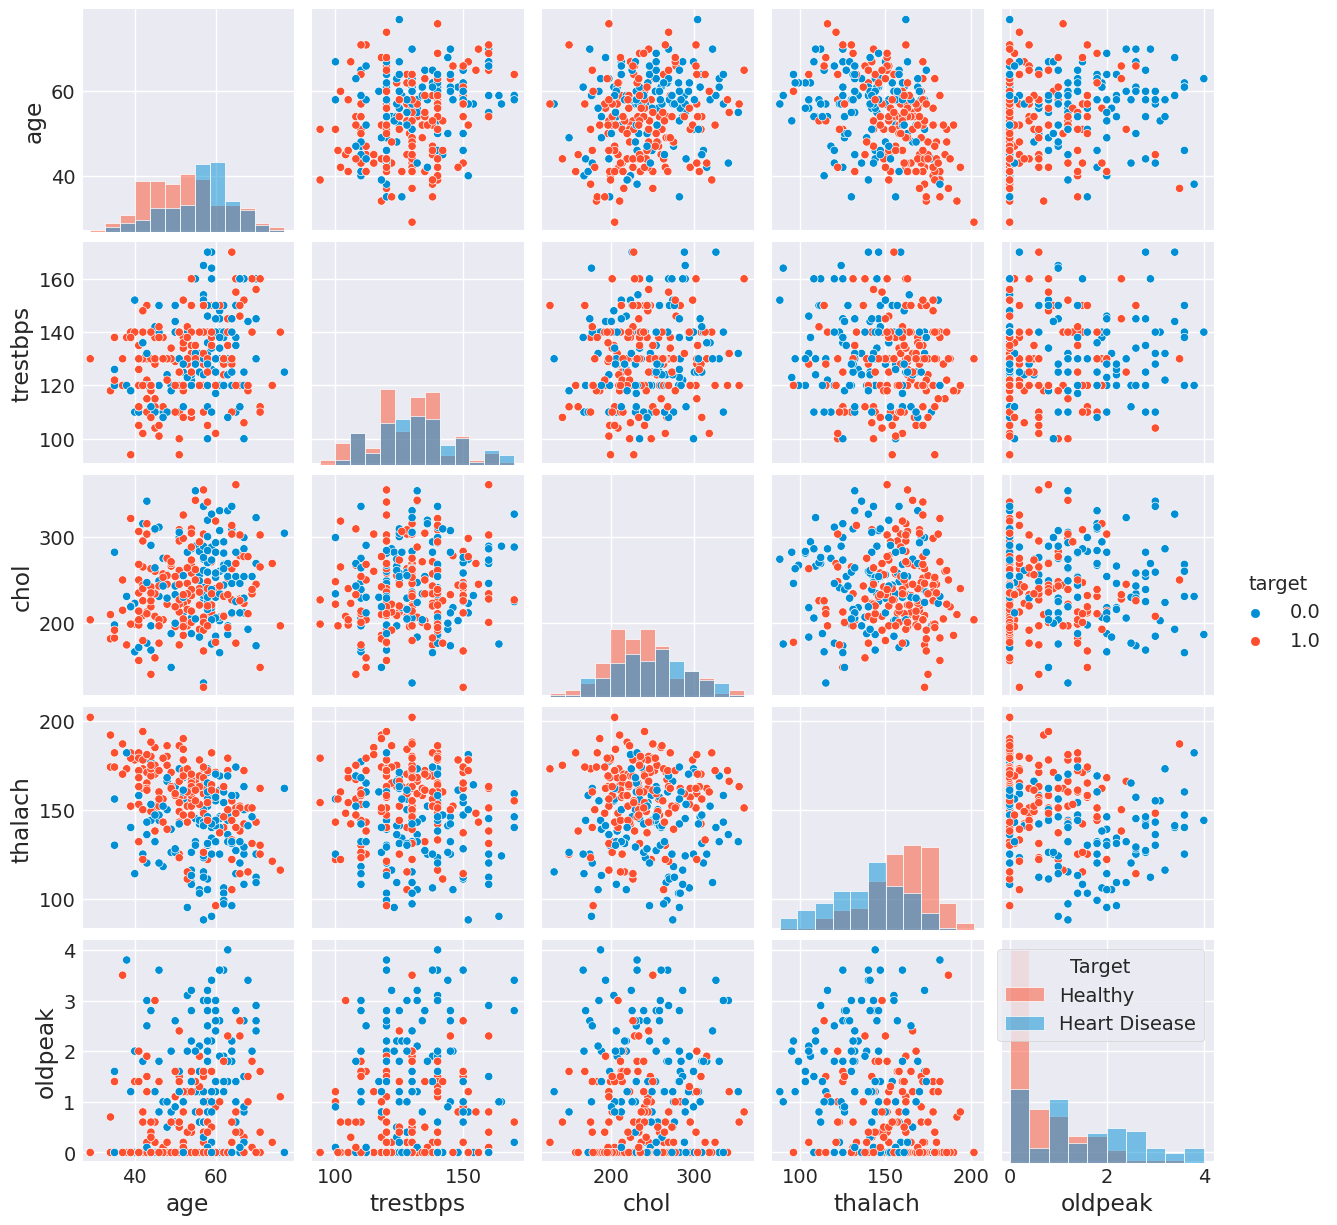

In [ ]:
# Memvisualisasikan pairplot untuk memeriksa hubungan antara variabel kontinu
sns.pairplot(data = df_heart_clean, vars = continuous_features, hue = 'target', diag_kind = "hist")
plt.legend(title = "Target", labels = ["Healthy", "Heart Disease"])

Text(0.5, 1.0, 'Correlation Between Features')

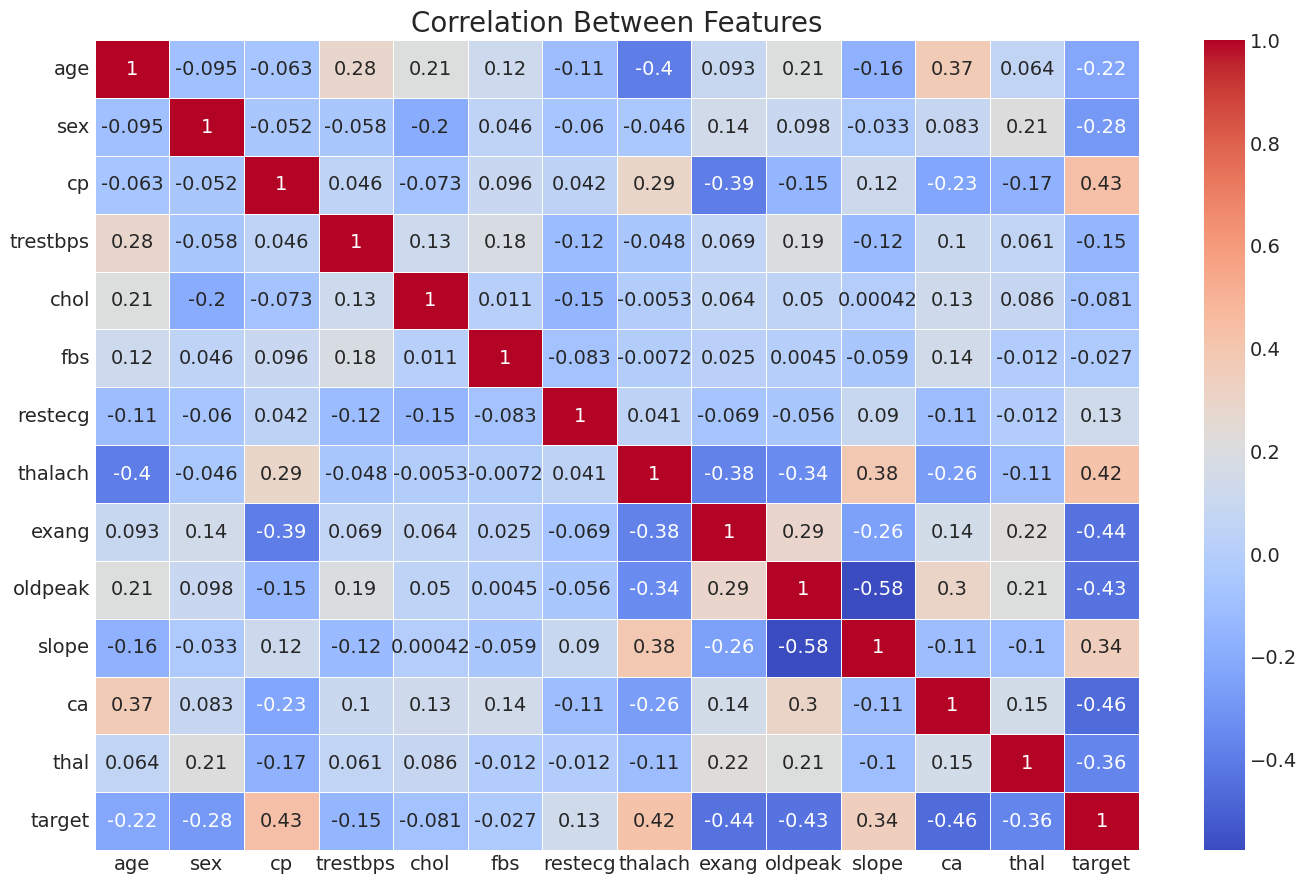

In [ ]:
# Correlation heatmap
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_heart.corr(), annot = True, linewidths = .5, cmap = "coolwarm")
plt.title('Correlation Between Features', fontsize = 20)